In [12]:
import pandas as pd
import numpy
from scipy.stats.mstats import gmean
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn

state_list = [
  "Alabama",
  "Alaska",
  "Arizona",
  "Arkansas",
  "California",
  "Colorado",
  "Connecticut",
  "Delaware",
  "District of Columbia",
  "Florida",
  "Georgia",
  "Hawaii",
  "Idaho",
  "Illinois",
  "Indiana",
  "Iowa",
  "Kansas",
  "Kentucky",
  "Louisiana",
  "Maine",
  "Maryland",
  "Massachusetts",
  "Michigan",
  "Minnesota",
  "Mississippi",
  "Missouri",
  "Montana",
  "Nebraska",
  "Nevada",
  "New Hampshire",
  "New Jersey",
  "New Mexico",
  "New York",
  "North Carolina",
  "North Dakota",
  "Ohio",
  "Oklahoma",
  "Oregon",
  "Pennsylvania",
  "Rhode Island",
  "South Carolina",
  "South Dakota",
  "Tennessee",
  "Texas",
  "Utah",
  "Vermont",
  "Virginia",
  "Washington",
  "West Virginia",
  "Wisconsin",
  "Wyoming",
]


In [1]:
import requests

for year in range(2020, 2000, -1):
  year = str(year)
  filename = f"usa_edu_data/tabn104.80_{year}.xls"
  with requests.get(f"https://nces.ed.gov/programs/digest/d{year[-2:]}/tables/xls/tabn104.88.xls", stream=True) as r:
    if r.status_code == 200:
      with open(filename, "wb") as f:
        f.write(r.content)

for year in range(2012, 2011, -1):
  year = str(year)
  filename = f"usa_edu_data/tabn015_{year}.xls"
  with requests.get(f"https://nces.ed.gov/programs/digest/d{year[-2:]}/tables/xls/tabn015.xls", stream=True) as r:
    if r.status_code == 200:
      with open(filename, "wb") as f:
        f.write(r.content)

In [2]:
for year in range(2011, 2000, -1):
  year = str(year)
  filename = f"usa_edu_data/tabn012_{year}.xls"
  with requests.get(f"https://nces.ed.gov/programs/digest/d{year[-2:]}/tables/xls/tabn012.xls", stream=True) as r:
    if r.status_code == 200:
      with open(filename, "wb") as f:
        f.write(r.content)

In [18]:
data = None

for year in range(2020, 2012, -1):
  data_current_year = pd.read_excel(f"usa_edu_data/tabn104.80_{year}.xls", skiprows=[0, 1, 2, 3, 4, 5, 6], header=None)
  if year > 2016:
    data_current_year = data_current_year.iloc[:, [0, 10, 19]]
  else:
    data_current_year = data_current_year.iloc[:, [0, 1, 13]]
  data_current_year.columns = ["GeoName", "high_school_percentage", "degree_percentage"]
  data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()
  data_current_year["year"] = year
  data_current_year = data_current_year.dropna()
  if data is not None:
    data = pd.concat([data, data_current_year])
  else:
    data = data_current_year
data = data.reset_index()
data.tail()

C:\Users\jirip\AppData\Local\Temp/ipykernel_9464/1824726300.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()


,index,GeoName,high_school_percentage,degree_percentage,year
404,57,Virginia,87.7922,88.1222,2013
405,58,Washington,90.0053,90.5973,2013
406,59,West Virginia,83.8844,83.9238,2013
407,60,Wisconsin,90.4802,90.8726,2013
408,61,Wyoming,92.3628,91.5356,2013


In [19]:
data_current_year = pd.read_excel(f"usa_edu_data/tabn015_2012.xls", skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], header=None)
data_current_year = data_current_year.iloc[:, [0, 1, 17]]
data_current_year.head()
data_current_year.columns = ["GeoName", "high_school_percentage", "degree_percentage"]
data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()
data_current_year["year"] = 2012
data_current_year = data_current_year.dropna()
data_current_year.head()
data = pd.concat([data, data_current_year])
data = data.reset_index()
data.tail()

C:\Users\jirip\AppData\Local\Temp/ipykernel_9464/2171708050.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()


,level_0,index,GeoName,high_school_percentage,degree_percentage,year
455,55,NaN,Virginia,86.2375,33.9271,2012
456,56,NaN,Washington,89.6754,30.9535,2012
457,57,NaN,West Virginia,82.5143,17.0820,2012
458,58,NaN,Wisconsin,89.9047,25.8178,2012
459,59,NaN,Wyoming,92.1662,23.6911,2012


In [20]:
for year in range(2011, 2007, -1):
  data_current_year = pd.read_excel(f"usa_edu_data/tabn012_{year}.xls", skiprows=[0, 1, 2, 3, 4, 5, 6, 7], header=None)
  data_current_year = data_current_year.iloc[:, [0, 1, 17]]
  data_current_year.columns = ["GeoName", "high_school_percentage", "degree_percentage"]
  data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()
  data_current_year["year"] = year
  data_current_year = data_current_year.dropna()
  data = pd.concat([data, data_current_year])
data_current_year.head()

data_edu_raw = data

C:\Users\jirip\AppData\Local\Temp/ipykernel_9464/2966254648.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_current_year["GeoName"] = data_current_year["GeoName"].str.replace(".", "").str.strip()


In [28]:
data_edu = data_edu_raw[["GeoName", "high_school_percentage", "degree_percentage", "year"]]
data_edu = data_edu.rename(columns={"GeoName": "state"})
data_edu = data_edu.sort_values(by=["state", "year"])
data_edu["degree_percentage"] = data_edu["degree_percentage"]/100 + 1
data_edu["degree_percentage_t-1"] = data_edu.groupby("state")["degree_percentage"].shift(1)
data_edu["degree_percentage_growth"] = data_edu["degree_percentage"] / data_edu["degree_percentage_t-1"]

data_edu["high_school_percentage"] = data_edu["high_school_percentage"]/100 + 1
data_edu["high_school_percentage_t-1"] = data_edu.groupby("state")["high_school_percentage"].shift(1)
data_edu["high_school_percentage_growth"] = data_edu["high_school_percentage"] / data_edu["high_school_percentage_t-1"]

data_edu = data_edu.dropna()

data_edu_agg = data_edu.groupby(by="state").agg({"high_school_percentage_growth": [gmean], "degree_percentage_growth": [gmean]}) - 1
data_edu_agg.columns = ["high_school_percentage_growth", "degree_percentage_growth"]

data_edu_agg.head()


,high_school_percentage_growth,degree_percentage_growth
state,,
Alabama,0.003133,0.003607
Alaska,0.001742,0.002788
Arizona,0.001819,0.003001
Arkansas,0.003001,0.003233
California,0.001828,0.003773


In [65]:
data_1 = pd.read_csv("CAGDP1__ALL_AREAS_2001_2020.csv", encoding="ISO-8859-1")
data_1 = data_1[data_1["Description"] == "Current-dollar GDP (thousands of current dollars)"]
data_1 = data_1[data_1["GeoName"].isin(state_list)]
data_1 = data_1.melt(id_vars=["GeoName"], value_vars=[str(i) for i in range(2001, 2020)], var_name="year",
                     value_name="gdp")
data_1 = data_1.dropna()
data_1 = data_1[data_1["gdp"] != "(NA)"]
data_1["gdp"] = data_1["gdp"].astype("int64")
data_1["year"] = data_1["year"].astype("int")
data_1.head()

data_2 = pd.read_excel("download.xls", skiprows=range(0, 5), nrows=59)
data_2["GeoName"] = data_2["GeoName"].replace("Alaska *", "Alaska")
data_2 = data_2.melt(id_vars=["GeoName"], value_vars=[str(i) for i in range(2008, 2020)], var_name="year",
                     value_name="population")
data_2["year"] = data_2["year"].astype("int")
data_2.head()

data_3 = pd.read_csv("SAIRPDImplicitRegionalPriceDeflatorsbystate.csv")
data_3 = data_3.melt(id_vars=["GeoName"], value_vars=[str(i) for i in range(2008, 2020)], var_name="year",
                     value_name="regional_deflator")
data_3["year"] = data_3["year"].astype("int")
data_3.head()

data = pd.merge(data_1, data_2, on=["GeoName", "year"])
data = pd.merge(data, data_3, on=["GeoName", "year"])
data = data.rename({"GeoName": "state"}, axis=1)
data["gdp_per_capita"] = data["gdp"] / data["population"]
data["gdp_per_capita"] = data["gdp_per_capita"] / (data["regional_deflator"] / 100)
# data["gdp_per_capita"] = numpy.log(data["gdp_per_capita"])
data_Y0 = data[data["year"] == 2008][["state", "gdp_per_capita"]]
data_Y0 = data_Y0.rename(columns={"gdp_per_capita": "Y0"})
data = data.sort_values(["state", "year"])
data["gdp_per_capita_t-1"] = data.groupby("state")["gdp_per_capita"].shift(1)
data["gdp_per_capita_growth"] = data["gdp_per_capita"] / data["gdp_per_capita_t-1"]
# data["gdp_per_capita_diff"] = data["gdp_per_capita"] - data["gdp_per_capita_t-1"]
data = data.dropna()
data.head()

data = data.merge(data_Y0, on=["state"])

data_agg = data.groupby(by="state").agg({"gdp_per_capita_growth": [gmean]}) - 1
data_agg.columns = data_agg.columns.droplevel()
data_agg.head()

data_agg = data_agg.merge(data_Y0, on=["state"])
data_Y0["Y0"] = numpy.log(data_Y0["Y0"])

data_final = data_agg.merge(data_edu_agg, on=["state"])

data_final["state"] = data_final["state"].str.strip()
data_final = data_final[~data_final["state"].isin(["District of Columbia", "Wyoming", "Alaska", "New York", "North Dakota"])]
data_final = data_final.reset_index()

data_final.head(20)

,index,state,gmean,Y0,high_school_percentage_growth,degree_percentage_growth
0,0,Alabama,0.008768,43.690318,0.003133,0.003607
1,2,Arizona,0.007531,43.177384,0.001819,0.003001
2,3,Arkansas,0.006893,41.319425,0.003001,0.003233
3,4,California,0.020571,51.226938,0.001828,0.003773
4,5,Colorado,0.009885,54.502884,0.001905,0.004983
5,6,Connecticut,0.008014,65.422168,0.001226,0.003985
6,7,Delaware,0.008634,65.998692,0.002046,0.003728
7,9,Florida,0.008849,42.915810,0.001687,0.003543
8,10,Georgia,0.014756,48.999901,0.002515,0.003903
9,11,Idaho,0.009096,40.820574,0.001926,0.003649


In [63]:
data_final.corr()

,index,gmean,Y0,high_school_percentage_growth,degree_percentage_growth
index,1.000000,0.023787,0.006313,-0.001721,0.191669
gmean,0.023787,1.000000,-0.483560,-0.136198,0.152041
Y0,0.006313,-0.483560,1.000000,-0.265429,0.147498
high_school_percentage_growth,-0.001721,-0.136198,-0.265429,1.000000,-0.110953
degree_percentage_growth,0.191669,0.152041,0.147498,-0.110953,1.000000


In [66]:
X = sm.add_constant(data_final)
mod = smf.ols(formula="gmean ~ Y0 + high_school_percentage_growth + degree_percentage_growth", data=X)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gmean   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     7.700
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           0.000341
Time:                        22:07:38   Log-Likelihood:                 186.61
No. Observations:                  45   AIC:                            -365.2
Df Residuals:                      41   BIC:                            -358.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0110      0.006      1.739      0.090      -0.002       0.024
Y0                               -0.0002      0.000     -1.983      0.054      -0.000    3.82e-06
high_school_percentage_growth    -2.4998      0.935     -2.672      0.011      -4.389      -0.611
degree_percentage_growth          3.7845      0.945      4.006      0.000       1.877       5.693
==============================================================================
Omnibus:                        0.228   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.059
Skew:                           0.087   Prob(JB):                        0.971
Kurtosis:                       2.972   Cond. No.                     7.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

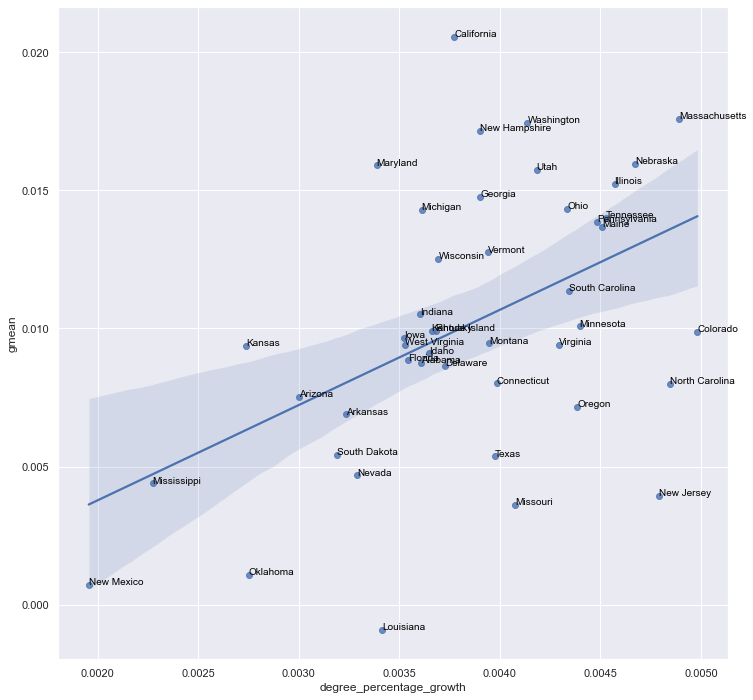

In [67]:
seaborn.regplot(x="degree_percentage_growth", y="gmean", data=data_final)
for line in range(0,data_final.shape[0]):
     plt.text(data_final.degree_percentage_growth[line], data_final.gmean[line], data_final.state[line], size='small', color='black')


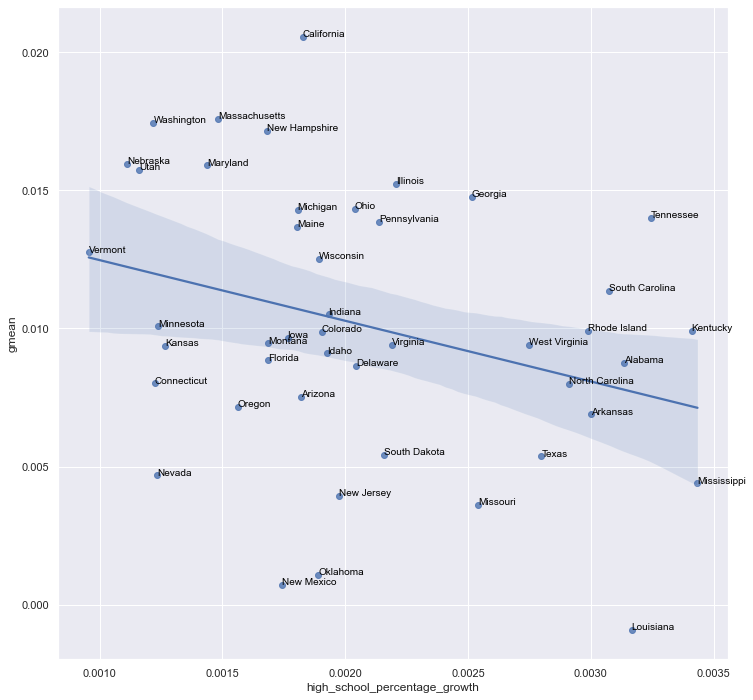

In [70]:
seaborn.regplot(x="high_school_percentage_growth", y="gmean", data=data_final)
for line in range(0,data_final.shape[0]):
     plt.text(data_final.high_school_percentage_growth[line], data_final.gmean[line], data_final.state[line], size='small', color='black')